# 1 - Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import jit, grad, vmap
import jaxquantum.devices as jqtd
import jax.numpy as jnp
import jaxquantum as jqt
import matplotlib.pyplot as plt

In [3]:
Ec_q = 0.8440030577770504/1.5
El_q = 0.29995365063860974
Ej_q = 3.7549273414716677*1.5

qubit = jqtd.Fluxonium.create(
    25,
    {"Ec": Ec_q, "El": El_q, "Ej": Ej_q, "phi_ext": 0.6},
    use_linear=False,
    N_pre_diag=100,
)

Text(0.5, 1.0, '$\\theta_{\\rm ext} = 0.5\\Phi_0$')

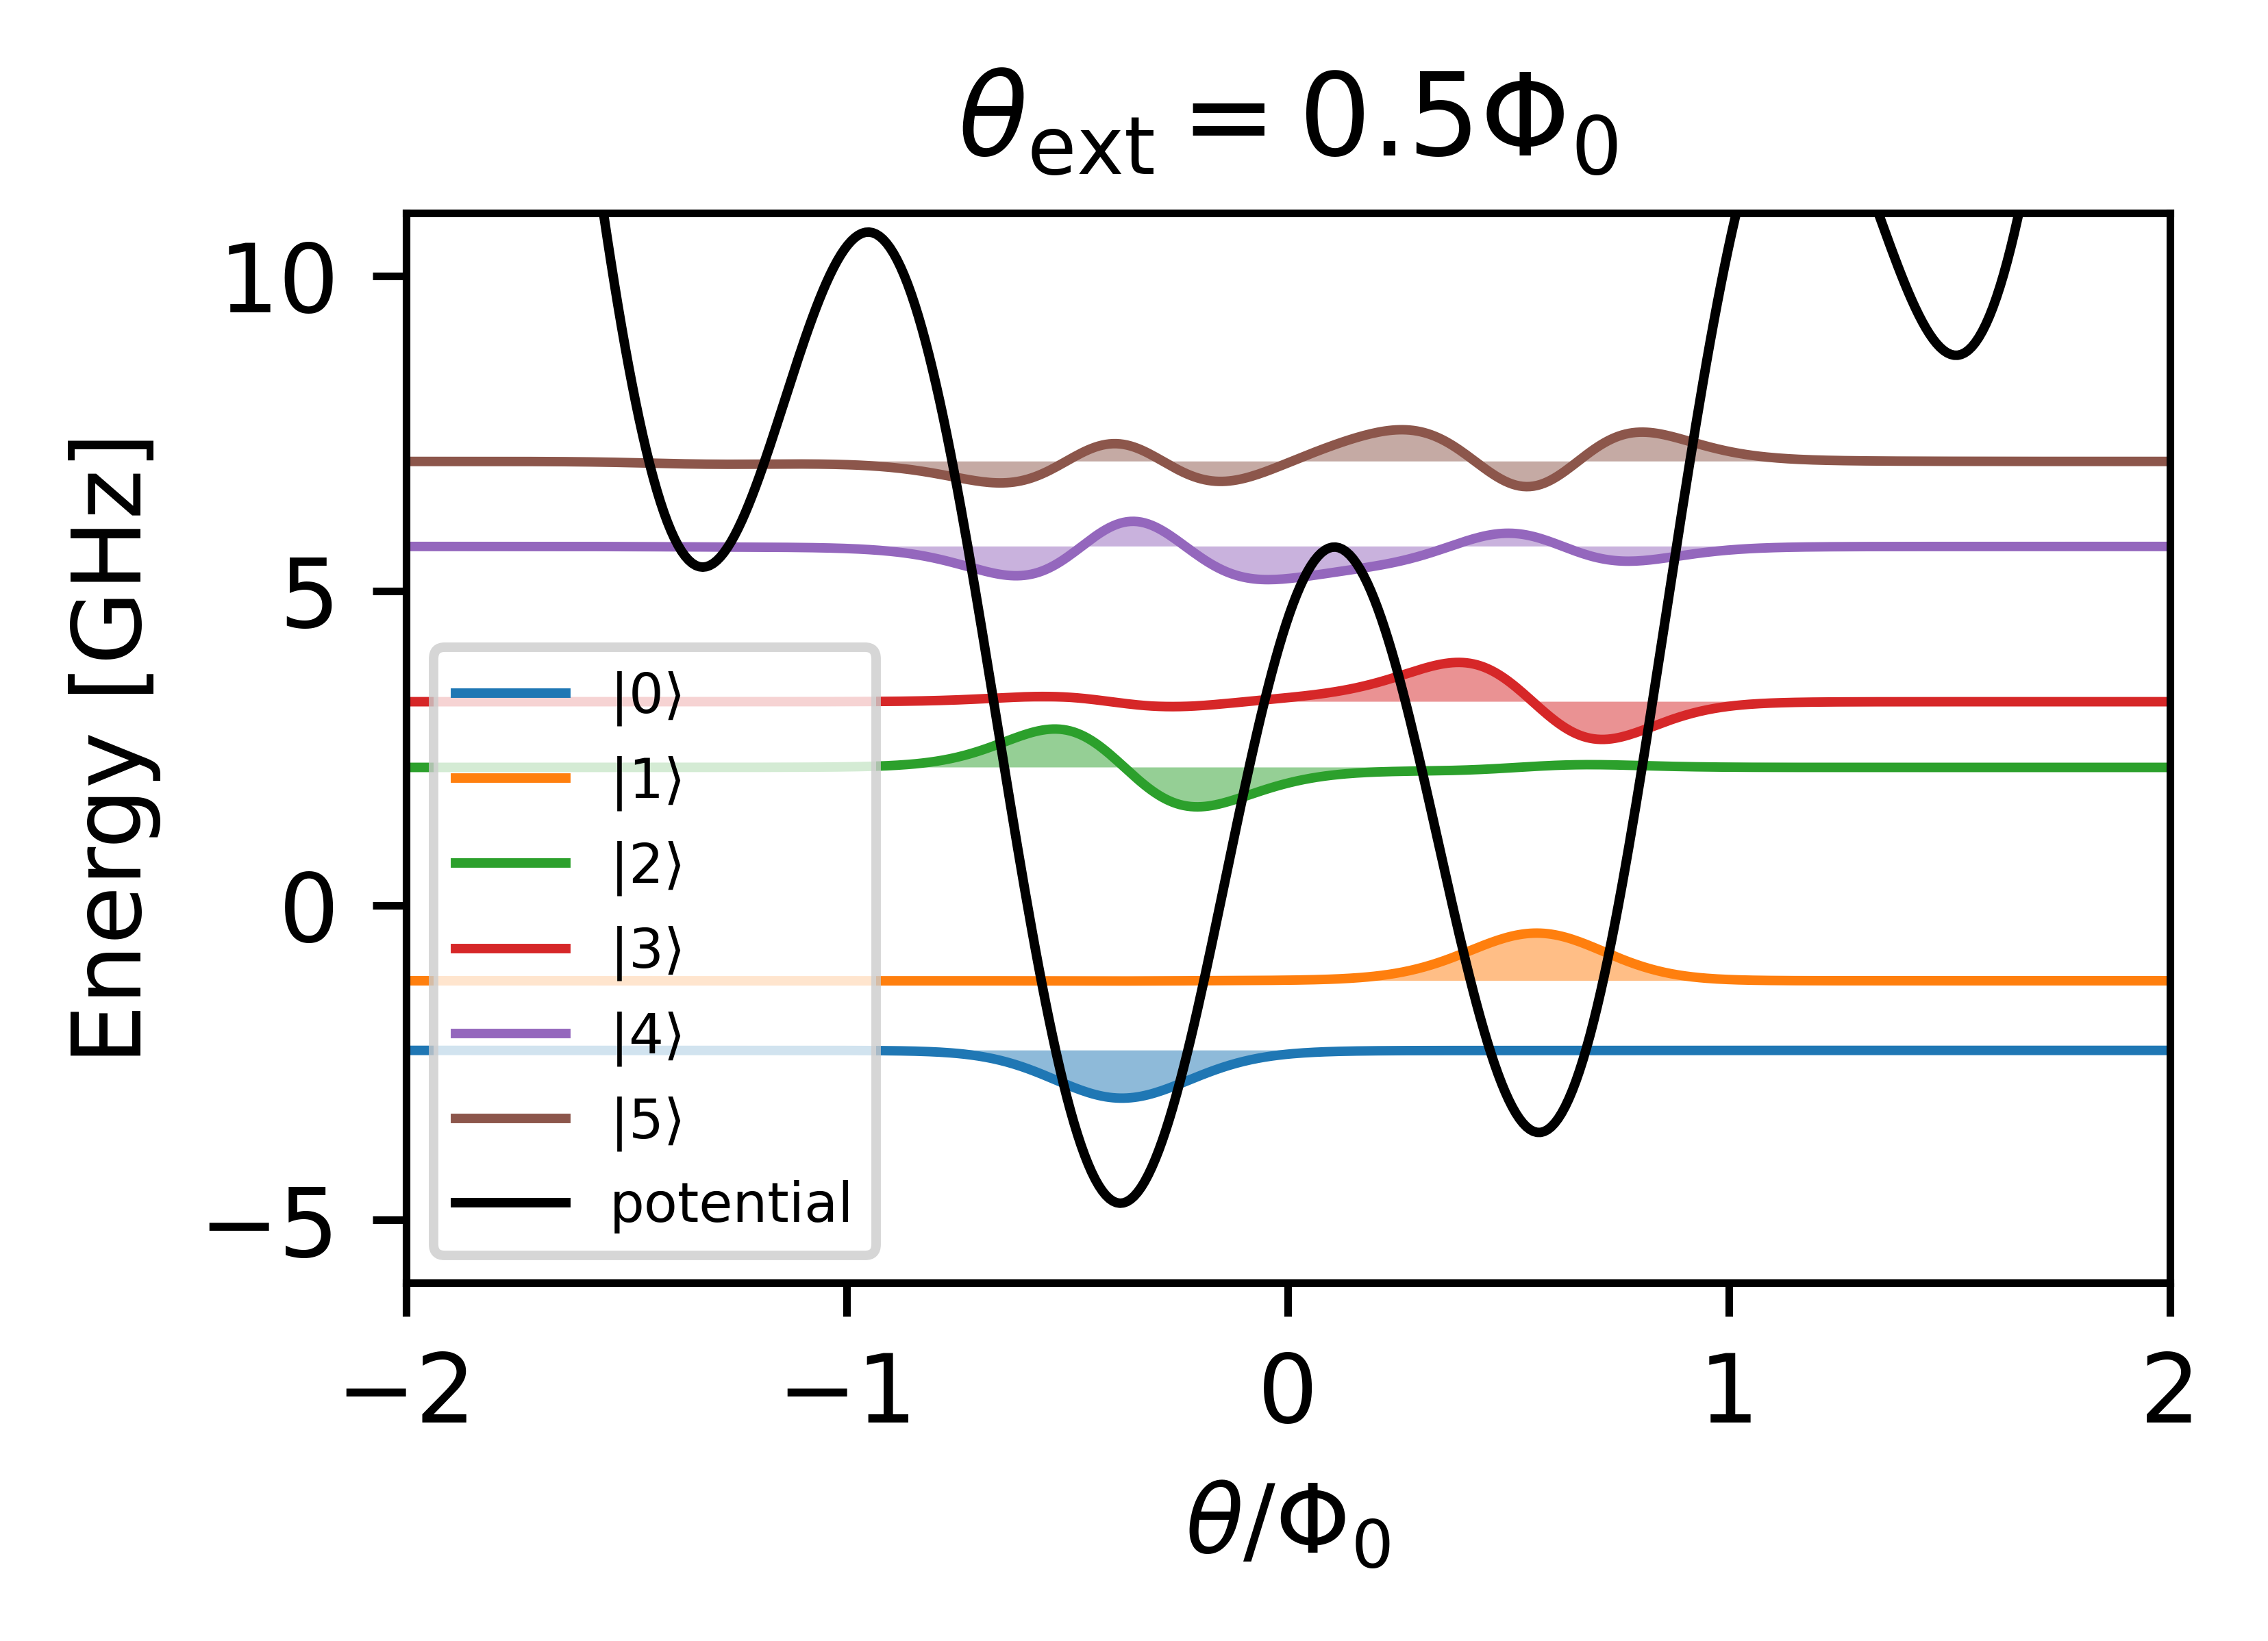

In [4]:
phi_vals = jnp.linspace(-2,2,500)
axs = qubit.plot_wavefunctions(phi_vals, max_n=6, mode="real")
axs.set_ylim(-6,11)
axs.set_xlim(-2,2)
axs.set_xlabel("$\\theta/\\Phi_0$")
axs.set_title("$\\theta_{\\rm ext} = 0.5\\Phi_0$")

# 2 - Devices

In [5]:
_, Ec_a, El_a = jqtd.calculate_lambda_over_four_resonator_zpf(3, 50)

resonator = jqtd.Resonator.create(
    10,
    {"Ec": Ec_a, "El": El_a},
    N_pre_diag=10,
)

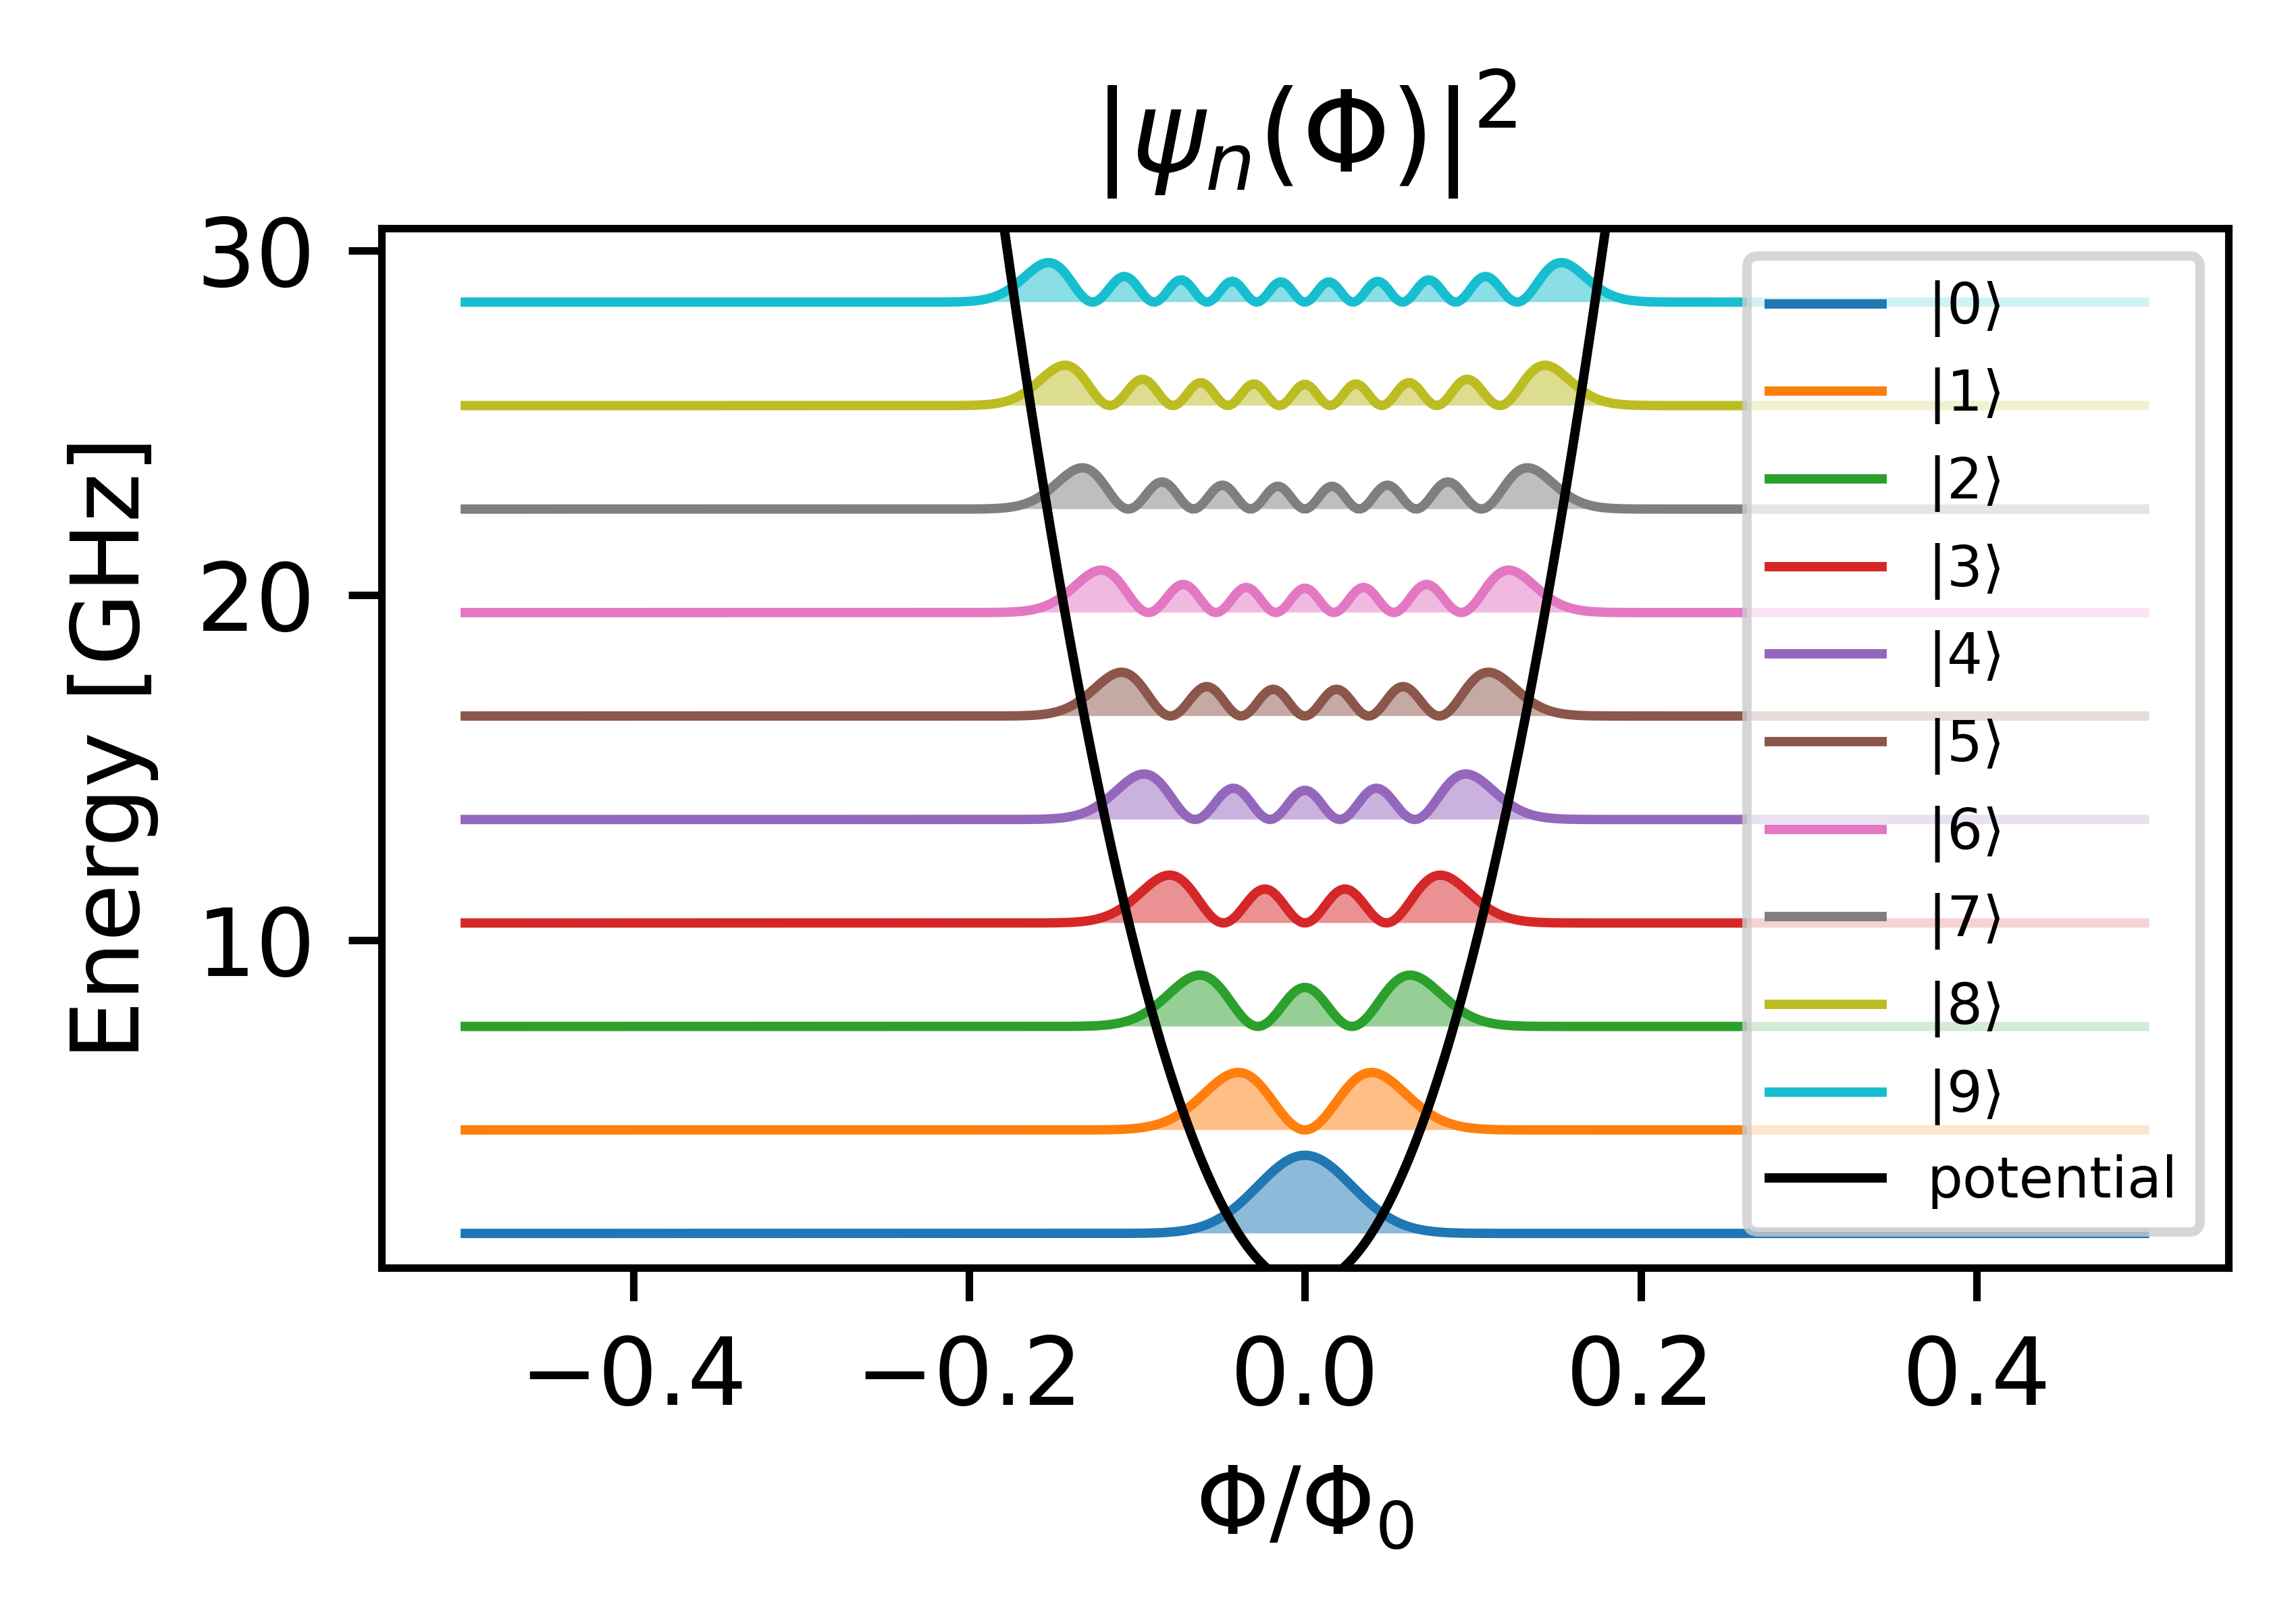

In [6]:
phi_vals = jnp.linspace(-0.5,0.5,500)
axs = resonator.plot_wavefunctions(phi_vals)

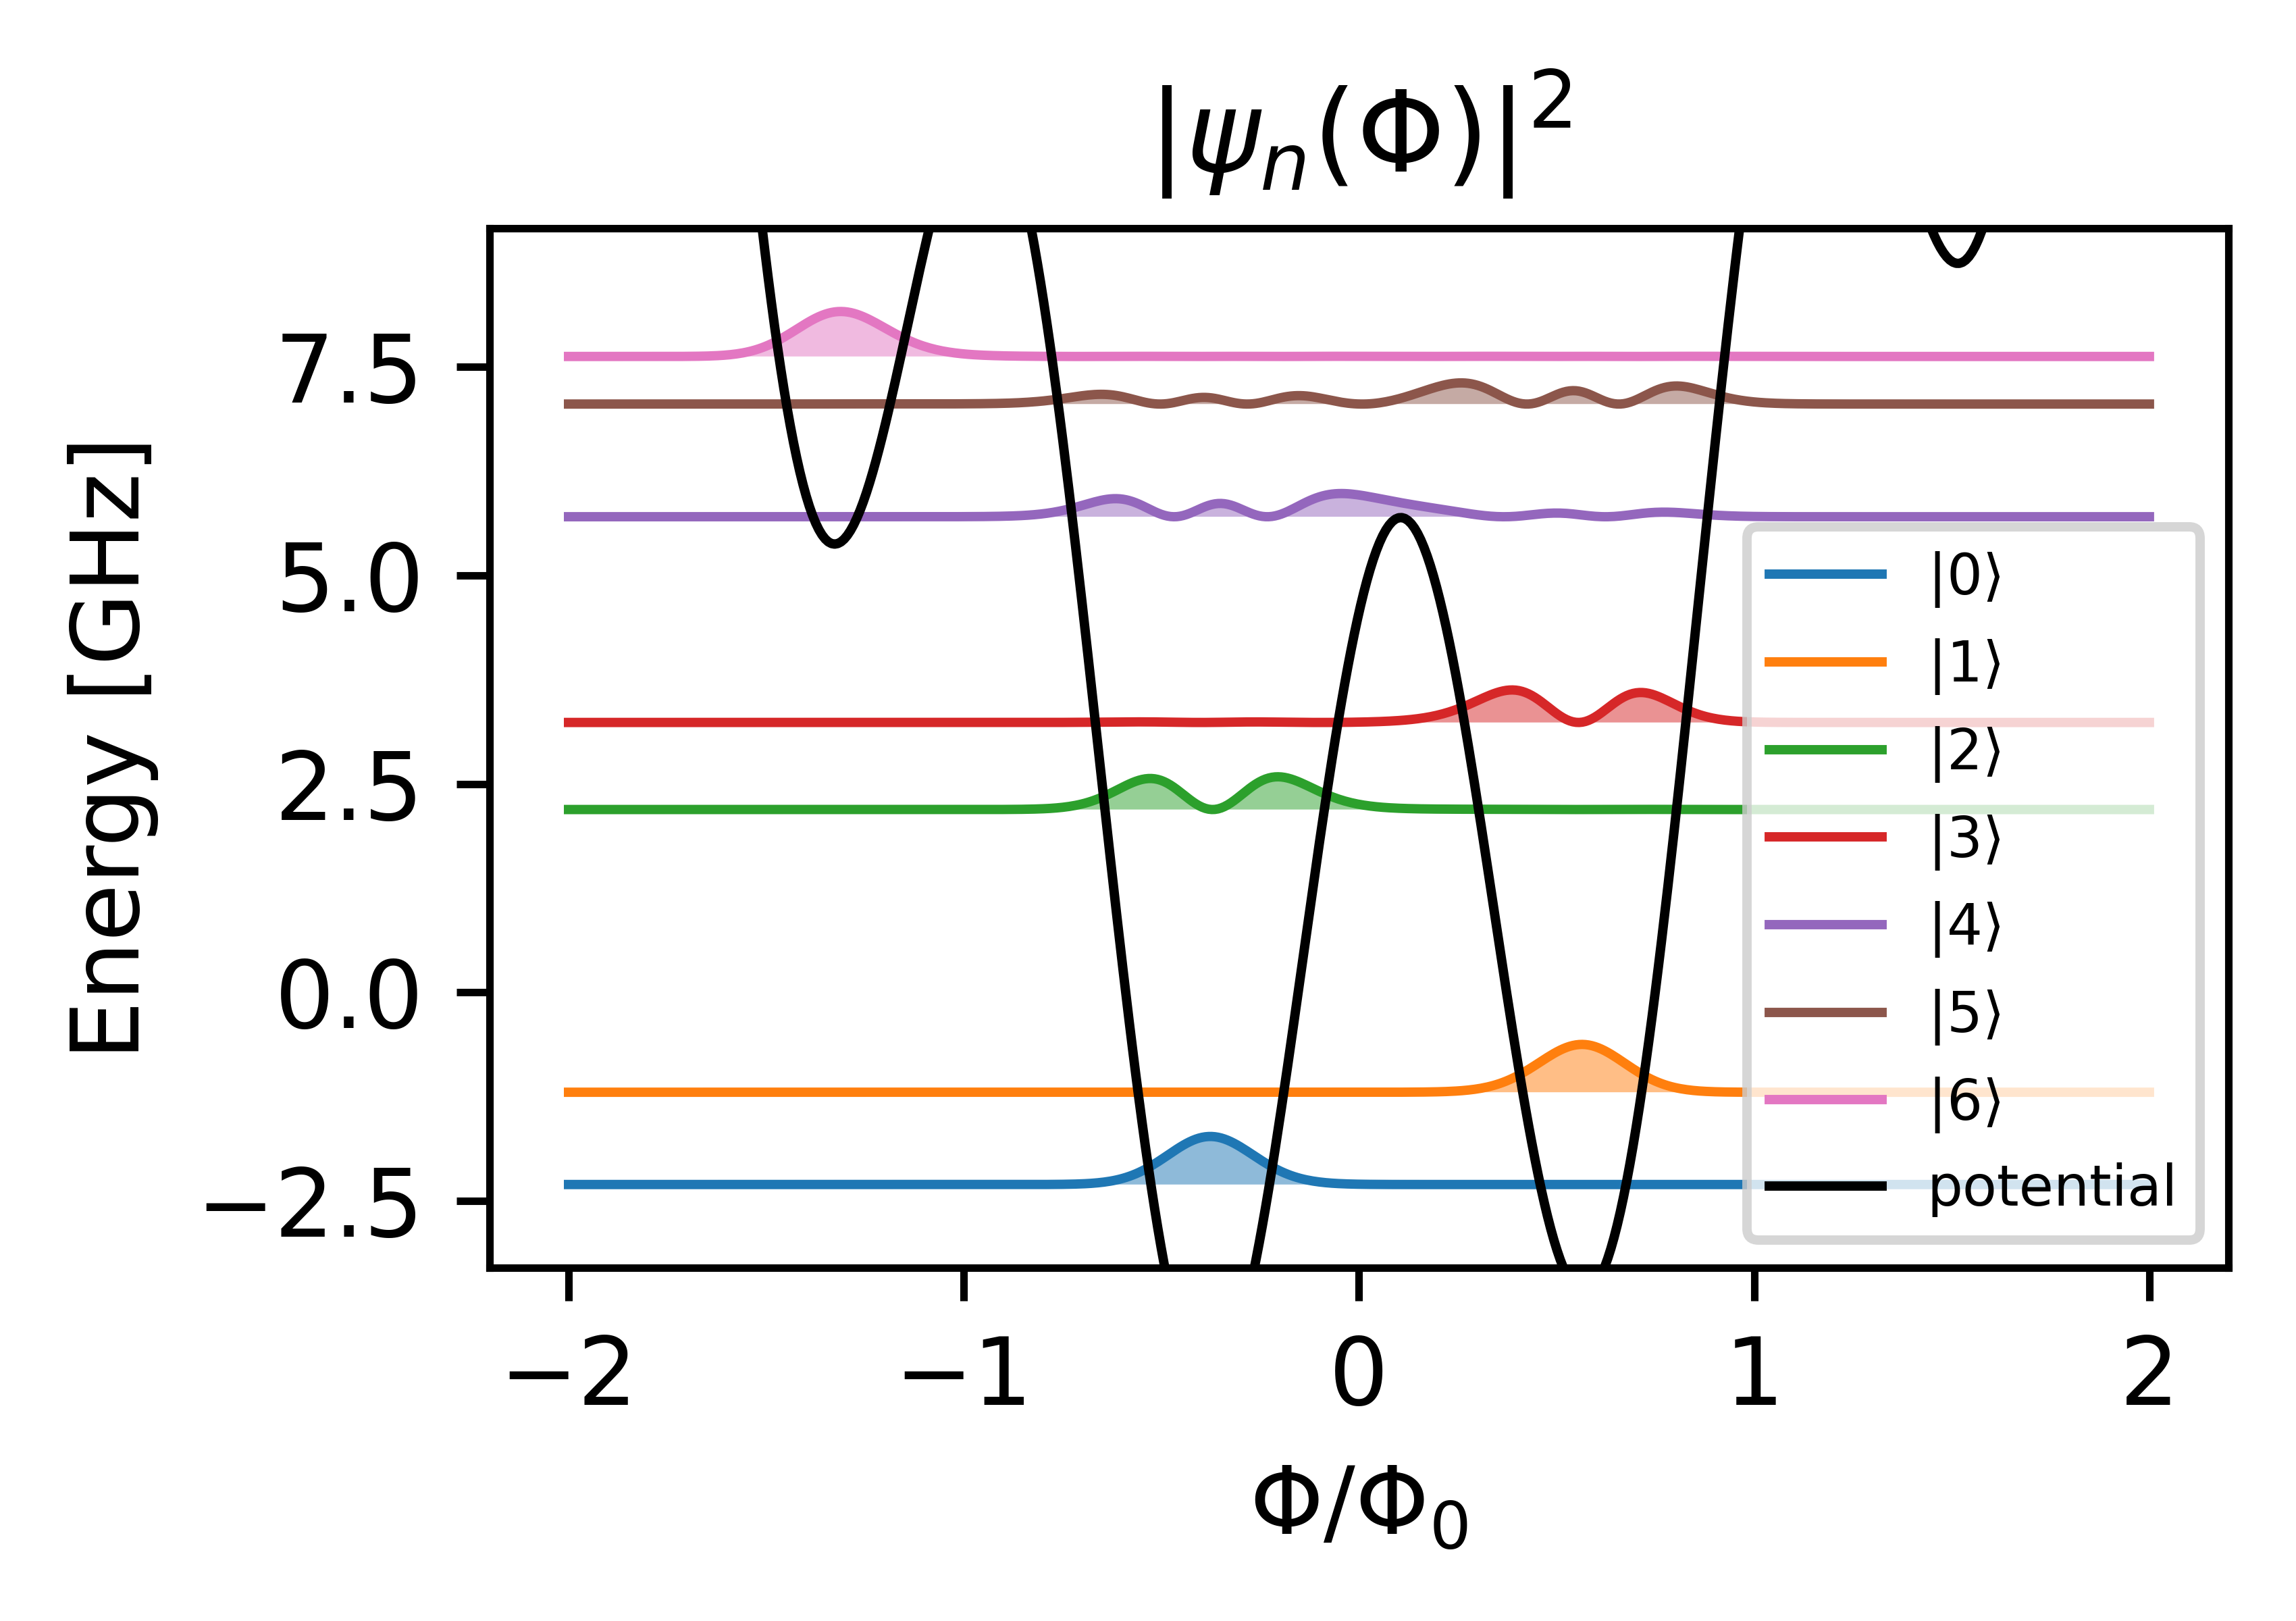

In [7]:
phi_vals = jnp.linspace(-2,2,500)
axs = qubit.plot_wavefunctions(phi_vals, max_n=7)

# 3 - System

In [8]:
g_rq = 0.3

devices = [resonator, qubit]
r_indx = 0
q_indx = 1
Ns = [device.N for device in devices]

a0 = jqtd.promote(resonator.ops["a"], r_indx, Ns)
a0_dag = jqtd.promote(resonator.ops["a_dag"], r_indx, Ns)

q0 = jqtd.promote(qubit.ops["a"], q_indx, Ns)
q0_dag = jqtd.promote(qubit.ops["a_dag"], q_indx, Ns)

couplings = []
couplings.append(-g_rq * (a0 - a0_dag) @ (q0 - q0_dag))

system = jqtd.System.create(devices, couplings=couplings)
system.params["g_rq"] = g_rq

In [9]:
Es, kets = system.calculate_eig()

# chi ----
χ_e = Es[1:, 1] - Es[:-1, 1]
χ_g = Es[1:, 0] - Es[:-1, 0]
χ = χ_e - χ_g

# kerr ----
# kerr[0,n] = (E(n+2, g) - E(n+1, g)) - (E(n+1, g) - E(n, g))
# kerr[1,n] = (E(n+2, e) - E(n+1, e)) - (E(n+1, e) - E(n, e))
K_g = (Es[2:, 0] - Es[1:-1, 0]) - (Es[1:-1, 0] - Es[0:-2, 0])
K_e = (Es[2:, 1] - Es[1:-1, 1]) - (Es[1:-1, 1] - Es[0:-2, 1])

χ, K_g, K_e

(Array([-4.72922932e-03, -1.40730837e-03, -9.11547918e-03, -6.42217969e-02,
         8.43032751e-02, -5.82624375e-02,  1.64026489e-01,  1.63791264e+00,
        -2.63168122e+00], dtype=float64),
 Array([-0.00799096,  0.00346023,  0.00222554, -0.04384819,  0.01841155,
        -0.06742353,  0.13421499,  1.51865852], dtype=float64),
 Array([-0.00466904, -0.00424794, -0.05288078,  0.10467688, -0.12415417,
         0.15486539,  1.60810114, -2.75093534], dtype=float64))

In [10]:
Es, kets = system.calculate_eig()

# chi ----
χ_e = Es[1:, 1] - Es[:-1, 1]
χ_g = Es[1:, 0] - Es[:-1, 0]
χ = χ_e - χ_g

# kerr ----
# kerr[0,n] = (E(n+2, g) - E(n+1, g)) - (E(n+1, g) - E(n, g))
# kerr[1,n] = (E(n+2, e) - E(n+1, e)) - (E(n+1, e) - E(n, e))
K_g = (Es[2:, 0] - Es[1:-1, 0]) - (Es[1:-1, 0] - Es[0:-2, 0])
K_e = (Es[2:, 1] - Es[1:-1, 1]) - (Es[1:-1, 1] - Es[0:-2, 1])

χ, K_g, K_e

(Array([-4.72922932e-03, -1.40730837e-03, -9.11547918e-03, -6.42217969e-02,
         8.43032751e-02, -5.82624375e-02,  1.64026489e-01,  1.63791264e+00,
        -2.63168122e+00], dtype=float64),
 Array([-0.00799096,  0.00346023,  0.00222554, -0.04384819,  0.01841155,
        -0.06742353,  0.13421499,  1.51865852], dtype=float64),
 Array([-0.00466904, -0.00424794, -0.05288078,  0.10467688, -0.12415417,
         0.15486539,  1.60810114, -2.75093534], dtype=float64))

In [11]:
Es, kets = system.calculate_eig()

# chi ----
χ_e = Es[1:, 1] - Es[:-1, 1]
χ_g = Es[1:, 0] - Es[:-1, 0]
χ = χ_e - χ_g

# kerr ----
# kerr[0,n] = (E(n+2, g) - E(n+1, g)) - (E(n+1, g) - E(n, g))
# kerr[1,n] = (E(n+2, e) - E(n+1, e)) - (E(n+1, e) - E(n, e))
K_g = (Es[2:, 0] - Es[1:-1, 0]) - (Es[1:-1, 0] - Es[0:-2, 0])
K_e = (Es[2:, 1] - Es[1:-1, 1]) - (Es[1:-1, 1] - Es[0:-2, 1])

χ, K_g, K_e

(Array([-4.72922932e-03, -1.40730837e-03, -9.11547918e-03, -6.42217969e-02,
         8.43032751e-02, -5.82624375e-02,  1.64026489e-01,  1.63791264e+00,
        -2.63168122e+00], dtype=float64),
 Array([-0.00799096,  0.00346023,  0.00222554, -0.04384819,  0.01841155,
        -0.06742353,  0.13421499,  1.51865852], dtype=float64),
 Array([-0.00466904, -0.00424794, -0.05288078,  0.10467688, -0.12415417,
         0.15486539,  1.60810114, -2.75093534], dtype=float64))

# 4 - auto differentiation

In [12]:
@jit
def calculate_metrics(f_r):
    # devices ---

    # Resonator
    _, Ec_a, El_a = jqtd.calculate_lambda_over_four_resonator_zpf(f_r, 50)

    resonator = jqtd.Resonator.create(
        10,
        {"Ec": Ec_a, "El": El_a},
        N_pre_diag=10,
    )

    # Fluxonium
    Ec_q = 1
    El_q = 0.5
    Ej_q = 8

    qubit = jqtd.Fluxonium.create(
        25,
        {"Ec": Ec_q, "El": El_q, "Ej": Ej_q, "phi_ext": 0.47},
        use_linear=False,
        N_pre_diag=100,
    )

    # system ----
    g_rq = 0.3

    devices = [resonator, qubit]
    r_indx = 0
    q_indx = 1
    Ns = [device.N for device in devices]

    a0 = jqtd.promote(resonator.ops["a"], r_indx, Ns)
    a0_dag = jqtd.promote(resonator.ops["a_dag"], r_indx, Ns)

    q0 = jqtd.promote(qubit.ops["a"], q_indx, Ns)
    q0_dag = jqtd.promote(qubit.ops["a_dag"], q_indx, Ns)

    couplings = []
    couplings.append(-g_rq * (a0 - a0_dag) @ (q0 - q0_dag))

    system = jqtd.System.create(devices, couplings=couplings)
    system.params["g_rq"] = g_rq

    # metrics ----
    Es, kets = system.calculate_eig()

    # chi
    χ_e = Es[1:, 1] - Es[:-1, 1]
    χ_g = Es[1:, 0] - Es[:-1, 0]
    χ = χ_e - χ_g

    # kerr
    # kerr[0,n] = (E(n+2, g) - E(n+1, g)) - (E(n+1, g) - E(n, g))
    # kerr[1,n] = (E(n+2, e) - E(n+1, e)) - (E(n+1, e) - E(n, e))
    K_g = (Es[2:, 0] - Es[1:-1, 0]) - (Es[1:-1, 0] - Es[0:-2, 0])
    K_e = (Es[2:, 1] - Es[1:-1, 1]) - (Es[1:-1, 1] - Es[0:-2, 1])

    χ, K_g, K_e

    K_avg = (K_g + K_e)/2

    return jnp.abs(χ[0]/K_avg[0])

grad_calculate_metrics = jit(grad(calculate_metrics))

In [13]:
calculate_metrics(3.0)

Array(1.64684707, dtype=float64)

In [14]:
grad_calculate_metrics(4.0)

Array(5.23220617, dtype=float64, weak_type=True)

# 5. Misc. Calculations

In [32]:
Ec_q = 0.8440030577770504/1.5
El_q = 0.29995365063860974
Ej_q = 3.7549273414716677*1.5

qubit = jqtd.Fluxonium.create(
    25,
    {"Ec": Ec_q, "El": El_q, "Ej": Ej_q, "phi_ext": 0.6},
    use_linear=False,
    N_pre_diag=100,
)

def get_state_overlaps(phi_ext):
    qubit = jqtd.Fluxonium.create(
        25,
        {"Ec": Ec_q, "El": El_q, "Ej": Ej_q, "phi_ext": phi_ext},
        use_linear=False,
        N_pre_diag=100,
    )
    system = jqtd.System.create([qubit], couplings=[])
    E, kets = system.calculate_eig()
    g = kets[0]
    e = kets[1]
    overlaps = {
        "n": (jqt.dag(e) @ qubit.ops["n"] @ g).abs().data[0][0],
        "phi": (jqt.dag(e) @ qubit.ops["phi"] @ g).abs().data[0][0]
    }
    return overlaps 

get_state_overlaps_map = jit(vmap(get_state_overlaps))

/opt/miniconda3/envs/jax-framework/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


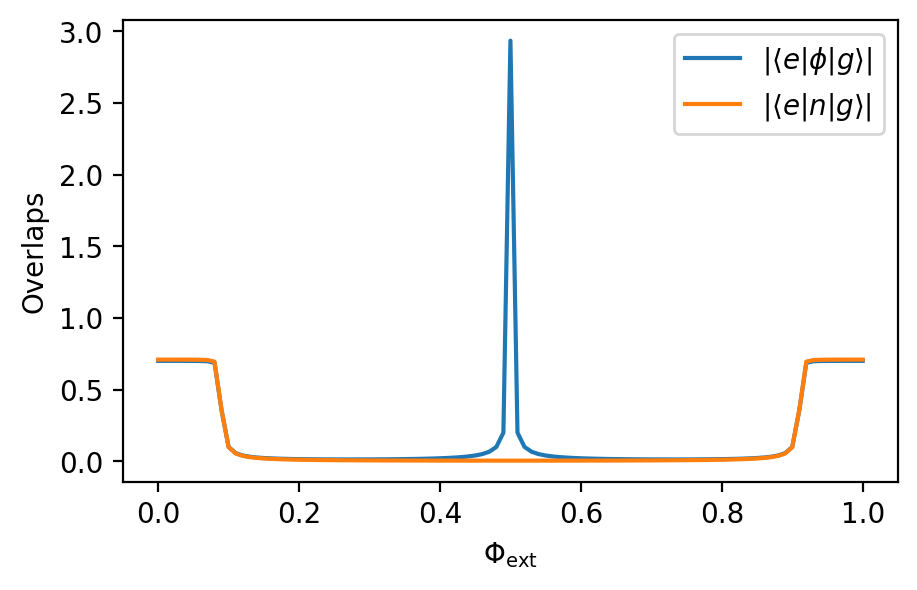

In [33]:
phi_exts = jnp.linspace(0.0, 1.0, 101)
overlaps = get_state_overlaps_map(phi_exts)

# plt.plot(phi_exts, overlaps["n"])
fig, ax = plt.subplots(1,1, dpi=200, figsize=(5,3))
ax.plot(phi_exts, overlaps["phi"], label=r"$|\langle e|\phi|g\rangle|$")
ax.plot(phi_exts, overlaps["n"], label=r"$|\langle e|n|g \rangle |$")
ax.set_xlabel(r"$\Phi_{\rm ext}$")
ax.set_ylabel(r"Overlaps")
ax.legend()

# Fitting Spectrum

In [1]:
from jax import jit, grad, vmap
import jaxquantum.devices as jqtd
import jax.numpy as jnp
import jaxquantum as jqt
import matplotlib.pyplot as plt

/home/shanjha/.conda/envs/bosonic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!nvidia-smi

Thu Jan 15 17:07:52 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.105.08             Driver Version: 580.105.08     CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H200                    On  |   00000000:DB:00.0 Off |                    0 |
| N/A   33C    P0             81W /  700W |       0MiB / 143771MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [3]:
Ec_q = 0.7878
El_q = 0.3723
Ej_q = 2.7874


@jit
def fluxonium_freq(Ec, El, Ej, phi_ext):    
    qubit = jqtd.Fluxonium.create(
        25,
        {"Ec": Ec, "El": El, "Ej": Ej, "phi_ext": phi_ext},
        use_linear=False,
        N_pre_diag=100,
    )
    Es = qubit.eig_systems["vals"]
    return Es[1] - Es[0]

fluxonium_freq(Ec_q, El_q, Ej_q, 0.5)

fluxonium_freq_flux_map = jit(vmap(fluxonium_freq, in_axes=(None, None, None, 0)))

In [6]:
flux_points = jnp.concatenate([jnp.array([0.0]), jnp.linspace(0.45, 0.55, 21)])

energies = fluxonium_freq_flux_map(Ec_q, El_q, Ej_q, flux_points)

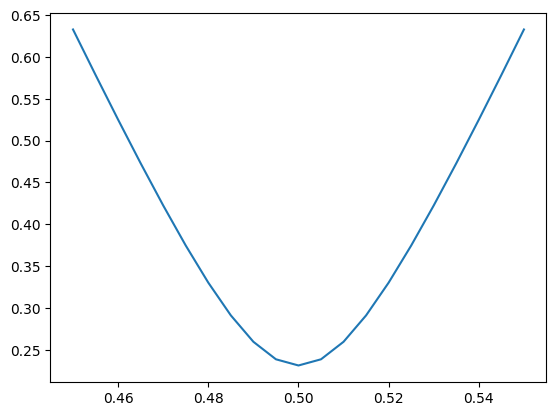

In [7]:
plt.plot(flux_points[1:], energies[1:])


In [9]:
import optax

def fit_fluxonium_parameters(flux_points, energies, initial_params=None, learning_rate=1e-3, num_steps=1000, 
                             zero_flux_weight_ratio=None, flux_tolerance=0.01):
    """
    Fit Ec, Ej, El parameters to match observed energies at given flux points.
    
    The loss function uses percentage residuals normalized by the observed energies.
    By default, points at 0.0 flux are weighted so their total weight equals the total
    weight of all points around 0.5 flux. This can be controlled with zero_flux_weight_ratio.
    
    Parameters:
    -----------
    flux_points : jnp.ndarray
        Array of flux points where energies were measured
    energies : jnp.ndarray
        Observed energies (E1 - E0) at corresponding flux points
    initial_params : dict, optional
        Initial guess for parameters {'Ec': float, 'El': float, 'Ej': float}
        If None, uses reasonable defaults
    learning_rate : float
        Learning rate for optimization
    num_steps : int
        Number of optimization steps
    zero_flux_weight_ratio : float, optional
        Ratio of total weight for 0.0 flux points relative to 0.5 flux points.
        If None (default), automatically sets so 0.0 flux points have same total weight
        as all 0.5 flux points combined. If 1.0, all points weighted equally.
        If 2.0, 0.0 flux points have 2x the total weight of 0.5 flux points.
    flux_tolerance : float
        Tolerance for identifying points at 0.0 flux (default: 0.01)
        
    Returns:
    --------
    dict : Fitted parameters {'Ec': float, 'El': float, 'Ej': float}
    """
    # Set initial parameters
    if initial_params is None:
        # Reasonable initial guesses based on typical fluxonium parameters
        Ec_init = 0.5
        El_init = 0.3
        Ej_init = 3.0
    else:
        Ec_init = initial_params['Ec']
        El_init = initial_params['El']
        Ej_init = initial_params['Ej']
    
    # Initialize parameters
    params = {
        'Ec': jnp.array(Ec_init),
        'El': jnp.array(El_init),
        'Ej': jnp.array(Ej_init)
    }
    
    # Calculate weights for different flux regions
    flux_points_array = jnp.array(flux_points)
    
    # Identify points at 0.0 flux (within tolerance)
    is_zero_flux = jnp.abs(flux_points_array) < flux_tolerance
    
    # Identify points around 0.5 flux (within tolerance)
    is_half_flux = jnp.abs(flux_points_array - 0.5) < flux_tolerance
    
    n_zero_flux = int(jnp.sum(is_zero_flux))
    n_half_flux = int(jnp.sum(is_half_flux))
    
    # Calculate weight ratio
    if zero_flux_weight_ratio is None:
        # Default: 0.0 flux points have same total weight as all 0.5 flux points
        if n_half_flux > 0 and n_zero_flux > 0:
            # Each 0.0 point should have weight = n_half_flux / n_zero_flux
            # so that: n_zero_flux * (n_half_flux / n_zero_flux) = n_half_flux
            
            weight_per_zero_point = float(n_half_flux) / float(n_zero_flux) 
        else:
            weight_per_zero_point = 1.0
        effective_ratio = 1.0  # For display purposes
    else:
        # User-specified ratio: total_weight(0.0) = zero_flux_weight_ratio * total_weight(0.5)
        if n_half_flux > 0 and n_zero_flux > 0:
            # n_zero_flux * w_zero = zero_flux_weight_ratio * n_half_flux * w_half
            # If w_half = 1.0, then w_zero = zero_flux_weight_ratio * n_half_flux / n_zero_flux
            weight_per_zero_point = zero_flux_weight_ratio * float(n_half_flux) / float(n_zero_flux)
        else:
            weight_per_zero_point = 1.0
        effective_ratio = zero_flux_weight_ratio
    
    # Convert to JAX array for use in loss function
    weight_per_zero_point = jnp.array(weight_per_zero_point)
    
    # Create weight array
    weights = jnp.ones_like(flux_points_array)
    weights = jnp.where(is_zero_flux, weight_per_zero_point, weights)
    
    # Calculate actual total weight ratio for reporting
    total_weight_zero = float(jnp.sum(weights * is_zero_flux))
    total_weight_half = float(jnp.sum(weights * is_half_flux))
    weight_per_zero_point_float = float(weight_per_zero_point)
    
    if total_weight_half > 0:
        actual_ratio = total_weight_zero / total_weight_half
    else:
        actual_ratio = 1.0
    
    print(f"Weight distribution: {n_zero_flux} points at 0.0 flux (weight={weight_per_zero_point_float:.2f}x each), "
          f"{n_half_flux} points around 0.5 flux (weight=1.0x each)")
    print(f"Total weight ratio (0.0 vs 0.5): {actual_ratio:.2f}x")
    
    # Define loss function (weighted mean squared percentage error)
    @jit
    def loss_fn(Ec, El, Ej):
        predicted_energies = fluxonium_freq_flux_map(Ec, El, Ej, flux_points)
        # Calculate percentage residuals: (predicted - observed) / observed * 100
        percent_residuals = ((predicted_energies - energies) / energies) * 100
        # Weighted mean squared percentage error
        return jnp.mean(weights * (percent_residuals ** 2))
    
    # Get gradient function
    grad_loss_fn = jit(grad(loss_fn, argnums=(0, 1, 2)))
    
    # Initialize optimizer
    optimizer = optax.adam(learning_rate=learning_rate)
    param_tuple = (params['Ec'], params['El'], params['Ej'])
    opt_state = optimizer.init(param_tuple)
    
    # Optimization loop
    for step in range(num_steps):
        # Compute gradients
        grads = grad_loss_fn(params['Ec'], params['El'], params['Ej'])
        
        # Update parameters
        updates, opt_state = optimizer.update(grads, opt_state)
        param_tuple = optax.apply_updates(param_tuple, updates)
        params['Ec'] = param_tuple[0]
        params['El'] = param_tuple[1]
        params['Ej'] = param_tuple[2]
        
        # Print progress every 100 steps
        if step % 100 == 0:
            loss = loss_fn(params['Ec'], params['El'], params['Ej'])
            # Loss is mean squared percentage error, so sqrt gives RMS percentage error
            rms_percent_error = jnp.sqrt(loss)
            print(f"Step {step}: RMS % Error = {rms_percent_error:.4f}%, Ec = {params['Ec']:.6f}, El = {params['El']:.6f}, Ej = {params['Ej']:.6f}")
    
    final_loss = loss_fn(params['Ec'], params['El'], params['Ej'])
    final_rms_percent_error = jnp.sqrt(final_loss)
    print(f"\nFinal RMS % Error: {final_rms_percent_error:.4f}%")
    print(f"Fitted parameters: Ec = {params['Ec']:.6f}, El = {params['El']:.6f}, Ej = {params['Ej']:.6f}")
    
    return {'Ec': float(params['Ec']), 'El': float(params['El']), 'Ej': float(params['Ej'])}

# Example usage:
# fitted_params = fit_fluxonium_parameters(flux_points, energies)


Weight distribution: 1 points at 0.0 flux (weight=16.00x each), 4 points around 0.5 flux (weight=1.0x each)
Total weight ratio (0.0 vs 0.5): 4.00x
Step 0: RMS % Error = 41.4012%, Ec = 0.501000, El = 0.301000, Ej = 2.999000
Step 100: RMS % Error = 20.9662%, Ec = 0.603040, El = 0.388751, Ej = 2.867707
Step 200: RMS % Error = 8.0353%, Ec = 0.673805, El = 0.425343, Ej = 2.764078
Step 300: RMS % Error = 6.2858%, Ec = 0.697172, El = 0.416723, Ej = 2.742440
Step 400: RMS % Error = 5.1039%, Ec = 0.714007, El = 0.405434, Ej = 2.739456
Step 500: RMS % Error = 4.2307%, Ec = 0.728880, El = 0.396733, Ej = 2.743724
Step 600: RMS % Error = 3.6111%, Ec = 0.741464, El = 0.390293, Ej = 2.752485
Step 700: RMS % Error = 3.1909%, Ec = 0.751761, El = 0.385613, Ej = 2.763011
Step 800: RMS % Error = 2.9236%, Ec = 0.759938, El = 0.382233, Ej = 2.773307
Step 900: RMS % Error = 2.7661%, Ec = 0.766249, El = 0.379798, Ej = 2.782244
Step 1000: RMS % Error = 2.6806%, Ec = 0.770981, El = 0.378052, Ej = 2.789390
Step 

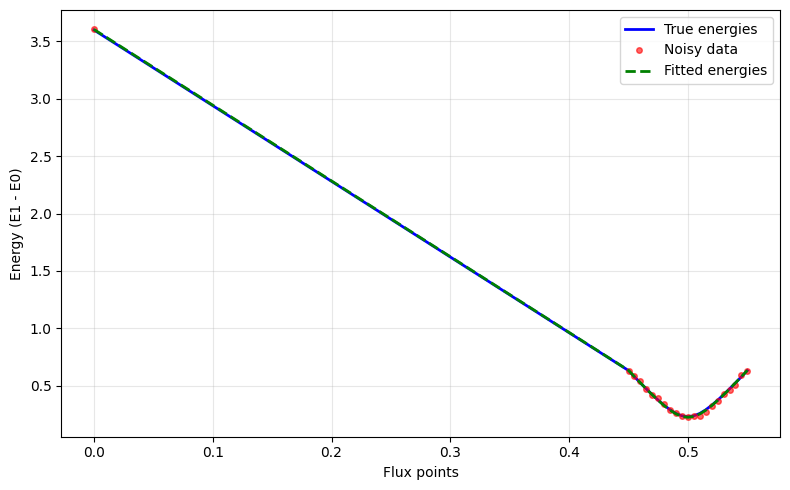

In [11]:
# Example: Fit parameters to the data from cell 24
# First, let's add some noise to simulate real experimental data
import numpy as np
np.random.seed(42)
noise_level = 0.01
energies_with_noise = energies + np.random.normal(0, noise_level, size=energies.shape)

# Fit the parameters
fitted_params = fit_fluxonium_parameters(flux_points, energies_with_noise, 
                                         initial_params={'Ec': 0.5, 'El': 0.3, 'Ej': 3.0},
                                         learning_rate=1e-3, num_steps=2000,
                                        zero_flux_weight_ratio=4)

# Compare fitted vs true parameters
print(f"\nTrue parameters:  Ec = {Ec_q:.6f}, El = {El_q:.6f}, Ej = {Ej_q:.6f}")
print(f"Fitted parameters: Ec = {fitted_params['Ec']:.6f}, El = {fitted_params['El']:.6f}, Ej = {fitted_params['Ej']:.6f}")

# Plot comparison
predicted_energies = fluxonium_freq_flux_map(fitted_params['Ec'], fitted_params['El'], fitted_params['Ej'], flux_points)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(flux_points, energies, 'b-', label='True energies', linewidth=2)
ax.plot(flux_points, energies_with_noise, 'ro', label='Noisy data', markersize=4, alpha=0.6)
ax.plot(flux_points, predicted_energies, 'g--', label='Fitted energies', linewidth=2)
ax.set_xlabel('Flux points')
ax.set_ylabel('Energy (E1 - E0)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
